<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [15]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [16]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [60]:
df['Freedom'].fillna(0, inplace=True)
df['Positive affect'].fillna(0, inplace=True)

In [51]:
df['Freedom'].isnull().sum()

0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

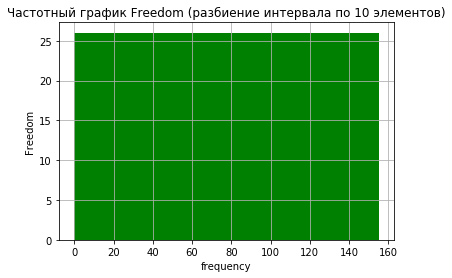

In [52]:
n, bins, patches = plt.hist(df['Freedom'], 6, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 6 элементов)')
plt.grid(True)
plt.show()

#Это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [18]:
#Медиана
statistics.median(df['Freedom'])

71.0

In [19]:
#Мода
statistics.mode(Freedom)

StatisticsError: no unique mode; found 156 equally common values

In [55]:
#Математическое ожидание
statistics.mean(df['Freedom'])

77.5

In [22]:
#Стандартное отклонение
statistics.pstdev(Freedom)
#Почему-то не хочет считать

nan

In [56]:
#Дисперсия
statistics.pvariance(Freedom)

2027.9166666666667

In [23]:
#Минимум
min(Freedom)

1.0

In [14]:
#Максимум
max(Freedom)

155.0

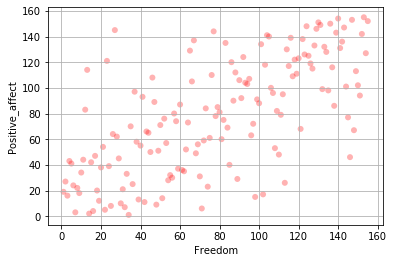

In [57]:
#Выбросы
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(Freedom, Positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive_affect')
plt.show()
#Заметны выбросы, которые принимают большие значения Positive_affect при малых значениях Freedom и наоборот

In [58]:
#Размах
duration_range = max(Freedom) - min(Freedom)
print(duration_range)

155.0


Почему нельзя найти моду?

In [0]:
#Моду не удалось посчитать, так как абсолютно все занчения уникальны и не встречаются чаще 1-го раза

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6878506740844935


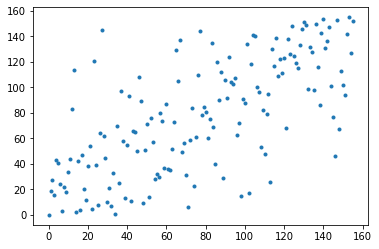

In [61]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
plt.scatter(Freedom, Positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
# Коэффициент Пирсона показывает насколько сильно взаимосвязаны две величины. У нас он получился равным 0.69,
# что говорит о довольно сильной взаимосвязи этих величин

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [63]:
#централизация
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [67]:
#масштабирование
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

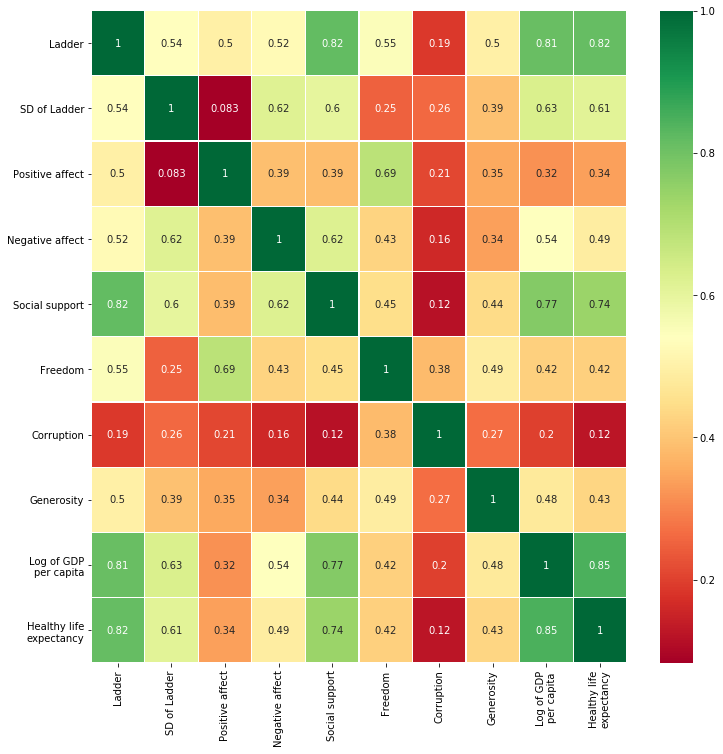

In [71]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [0]:
# Наибольшая корреляция заметная между "Log of GDP per capita" и "Healthy life expectancy"
# Это можно объяснить тем, что связь ВВП и продолжительности жизни определяется уровнем экономики в стране, в том числе и медицины

Загрузить таблицу цен на авокадо: 

In [72]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

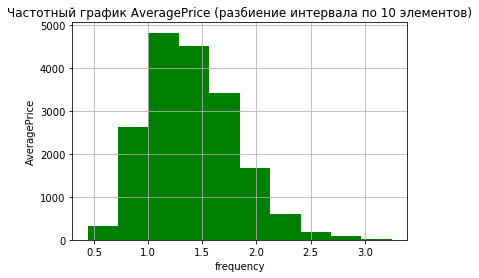

In [73]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#Это Гауссово распределение со смещением влево

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: 0.8878549976059934


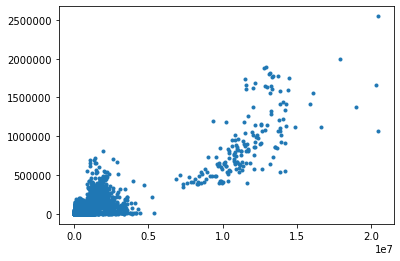

In [90]:
_4046 = df['4046']
_4225 = df['4225']
_4770 = df['4770']
Average_Price = df['AveragePrice']
corr, p_value = pearsonr(_4225, _4770)
plt.scatter(_4225, _4770, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
#В некоторых случах наблюдаеся большой коэффициент корреляции, более 0,88 (в случаях 4046 и 4225; 4046 и 4770; 4225 и 4770), при этом чисто графически корреляция не так заметна
#Это может говорить о том, что коэффициент корряляции не всегдя явно отображает взаимосвязь величин

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [111]:
df_model = df.query('type=="organic" and region=="LasVegas" and Date < "2017-07-31"').filter(items = ['Date', 'AveragePrice'])
df_model = df_model.rename(columns={'Date':'ds', 'AveragePrice':'y'})
df_model

,ds,y
10218,2015-12-27,1.94
10219,2015-12-20,1.99
10220,2015-12-13,1.89
10221,2015-12-06,1.97
10222,2015-11-29,2.17
...,...,...
15902,2017-01-29,1.31
15903,2017-01-22,1.34
15904,2017-01-15,1.39
15905,2017-01-08,1.22


In [114]:
df_model = df_model.sort_values(by='ds')
amount_80 = int(len(df_model)*0.8)
train_price = df_model[:amount_80]
test_price = df_model[amount_80:]

In [121]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
train_price.tail()

,ds,y
13025,2016-12-25,1.35
15906,2017-01-01,1.36
15905,2017-01-08,1.22
15904,2017-01-15,1.39
15903,2017-01-22,1.34


In [123]:
test_price.tail()

,ds,y
15880,2017-07-02,1.73
15879,2017-07-09,1.82
15878,2017-07-16,1.89
15877,2017-07-23,1.89
15876,2017-07-30,1.72


In [125]:
future = m.make_future_dataframe(periods=190)
forecast = m.predict(future)

In [126]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.809941,1.271941,1.782162,1.809941,1.809941,-0.281599,-0.281599,-0.281599,-0.281599,-0.281599,-0.281599,0.0,0.0,0.0,1.528341
1,2015-01-11,1.808473,1.276362,1.770960,1.808473,1.808473,-0.297602,-0.297602,-0.297602,-0.297602,-0.297602,-0.297602,0.0,0.0,0.0,1.510871
2,2015-01-18,1.807005,1.272525,1.781553,1.807005,1.807005,-0.278370,-0.278370,-0.278370,-0.278370,-0.278370,-0.278370,0.0,0.0,0.0,1.528636
3,2015-01-25,1.805538,1.317866,1.829876,1.805538,1.805538,-0.242553,-0.242553,-0.242553,-0.242553,-0.242553,-0.242553,0.0,0.0,0.0,1.562985
4,2015-02-01,1.804070,1.333270,1.837512,1.804070,1.804070,-0.204968,-0.204968,-0.204968,-0.204968,-0.204968,-0.204968,0.0,0.0,0.0,1.599103


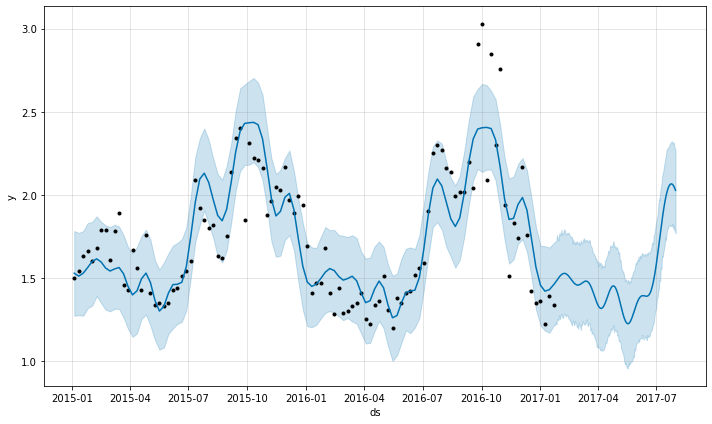

In [127]:
fig1 = m.plot(forecast)